<h1 style="text-align:center"> Hands on BiasAdjustCXX </h1>

<br><br>
Copyright (C) 2023 Benjamin Thomas Schwertfeger<br>
E-Mail: benjamin.schwertfeger@awi.de, contact@b-schwertfeger.de<br>
GitHub: https://github.com/btschwertfeger/BiasAdjustCXX<br>
Documentation: https://biasadjustcxx.readthedocs.io/en/latest/

*This Notebook serves as an example on how to download, build/compile, and install the BiasAdjustCXX command-line tool that can be used to bias-correct time-series climate data.*


- All data sets used here are dummy time-series and random generated, but the code can be applied to any model generated data that fulfills the requirements. 
_____

# 1. Download BiasAdjustCXX
Clone the repository into the home directory (you can download it to a directory of your choice)

In [1]:
%%bash

# clone to home
git clone https://github.com/btschwertfeger/BiasAdjustCXX.git ~/BiasAdjustCXX 2> /dev/null
if [ $? != 0 ]; then
    echo "Downloading update ..."
    cd ~/BiasAdjustCXX && git pull https://github.com/btschwertfeger/BiasAdjustCXX.git 2> /dev/null
fi

# 2. Load required modules (if not done so far)
After the repository is downloaded, the required library `netcdf4cxx` and the tool `CMake` must be loaded to compile the `BiasAdjustCXX` tool.

* CMake is available at: https://cmake.org/install/

* The NetCDF-4 C++ library can be downloaded from here: https://github.com/Unidata/netcdf-cxx4

If you are on Linux, you can install the NetCDF-4 C++ librariy using the following instructions: 

```bash
git clone https://github.com/Unidata/netcdf-cxx4.git /netcdf-cxx4 \
    cd /netcdf-cxx4 \
    && cmake -S . -B build \
    && cmake --build build \
    && cd build \
    && make install
```

# 3. Compile and install BiasAdjustCXX

In [2]:
%%bash
# enter the project directory
cd ~/BiasAdjustCXX
# compile and build BiasAdjustCXX
make build

cmake -S . -B build && cmake --build build --target BiasAdjustCXX
-- The CXX compiler identification is AppleClang 14.0.3.14030022
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- searching netCDFCxx...
-- Found netCDFCxx: /usr/local/lib/libnetcdf-cxx4.dylib  
-- NetCDFCxx found!
-- The C compiler identification is AppleClang 14.0.3.14030022
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Found Python: /Users/benjamin/opt/miniconda3/envs/awipyenv/bin/python3.9 (found version "3.9.7") found components: Interpreter 
-- Per

#### To install the fresh compiled tool you can run the following cell:

In [4]:
%%bash 
cd ~/BiasAdjustCXX
make install

cd build && make install
[100%] Built target BiasAdjustCXX
Install the project...
-- Install configuration: ""
-- Installing: /usr/local/bin/BiasAdjustCXX


#### Run the following cell to check if the tool was successfully installed:

In [5]:
%%bash

BiasAdjustCXX -h

BiasAdjustCXX Copyright (C) 2023 Benjamin Thomas Schwertfeger
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under certain conditions; type 'show -c' for details.

Usage: BiasAdjustCXX			\
	 --ref observation_data.nc	\
	 --contr control_data.nc	\
	 --scen data_to_adjust.nc	\
	 -v tas				\
	 -m linear_scaling		\
	 -o result_linear_scaling.nc

====== Parameters ======
    required:
	--ref, --reference		observation/reanalysis data => input file/file path
	--contr, --control		modeled data (control period) => input file/file path
	--scen, --scenario		data to adjust/correct (scenario period) => input file/file path
	-o, --output			output file/file path
	-m, --method			the bias correction technique to apply
	-v, --variable			variable name (e.g.: tas, tsurf, pr) 
    optional:
	-k, --kind			kind of adjustment e.g.: '+' or '*' for additive or multiplicative method (default: '+')
	-q, --quantiles			number of quantiles to respect when

# 4. Usage Example

Now we want to adjust a 3-dimensional data set with a resolution of 10950 x 4 x 2 (time, lat, lon)

This is the command with comments:
```bash
BiasAdjustCXX \
    --ref $observations_control_period \ # reference data set (control period)
    --contr $modeled_control_period    \ # modeled data set   (control period)
    --scen $modeled_scenario_period    \ # data set to adjust (scenario period)
    -o $ofile                          \ # output file        (path + file name)       
    -v $variable                       \ # variable of interest
    -k $kind                           \ # additive or multiplicative adjustment
    -m $method                         \ # adjustment method 
    -p 4                                 # number of threads to use
```

And when executing the following cell the LS-bias-corrected output file `tas_bias-corrected_result.nc` will be saved in `~/BiasAdjustCXX/output/`

In [13]:
%%bash

# enter the project directory, to access the input data more easily
cd ~/BiasAdjustCXX

# create an output directory (if not exist)
mkdir -p output 

BiasAdjustCXX \
    --ref input_data/observations.nc                 \
    --contr input_data/control.nc                    \
    --scen input_data/scenario.nc                    \
    --output "output/tas_bias-corrected_result.nc"   \
    --variable "tas"                                 \
    --kind "+"                                       \
    --method linear_scaling                          \
    --processes 4                                      


BiasAdjustCXX Copyright (C) 2023 Benjamin Thomas Schwertfeger
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under certain conditions; type 'show -c' for details.

INFO: Data sets available
INFO: Method: linear_scaling (add)
INFO: Threads: 4
INFO: Scaling will be performed based on long-term 31-day intervals.
INFO: Starting the adjustment ...
2 / 2 [ ###################################################################### ] 100 %
INFO: Preparing data for saving ...
INFO: Saving: output/tas_bias-corrected_result.nc
INFO: Done!
Runtime: 410.493ms


After the data set is adjusted, we can now load and compare the results

In [2]:
import sys,os,warnings
warnings.filterwarnings('ignore')

In [1]:
# [optional] Install python modules
# !python3 -m pip install matplotlib netCDF4 xarray numpy scikit-learn

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the data sets
Now the reference, modeled and adjusted data sets can be loaded

In [6]:
data_path = '~/BiasAdjustCXX/input_data'
var = 'tas'

# control period
obsh = xr.open_dataset(f'{data_path}/observations.nc')
simh = xr.open_dataset(f'{data_path}/control.nc')

# scenario period
obsp = xr.open_dataset(f'{data_path}/observations_future.nc')
simp = xr.open_dataset(f'{data_path}/scenario.nc')

In [7]:
# load the previous corrected data set
tas_ls_corrected = xr.open_dataset('~/BiasAdjustCXX/output/tas_linear_scaling_kind+.nc')
tas_ls_corrected

<xarray.Dataset>
Dimensions:  (time: 10950, lat: 4, lon: 2)
Coordinates:
  * time     (time) object 2001-01-01 00:00:00 ... 2030-12-31 00:00:00
  * lat      (lat) float32 23.0 24.0 25.0 26.0
  * lon      (lon) float32 0.0 1.0
Data variables:
    tas      (time, lat, lon) float32 ...

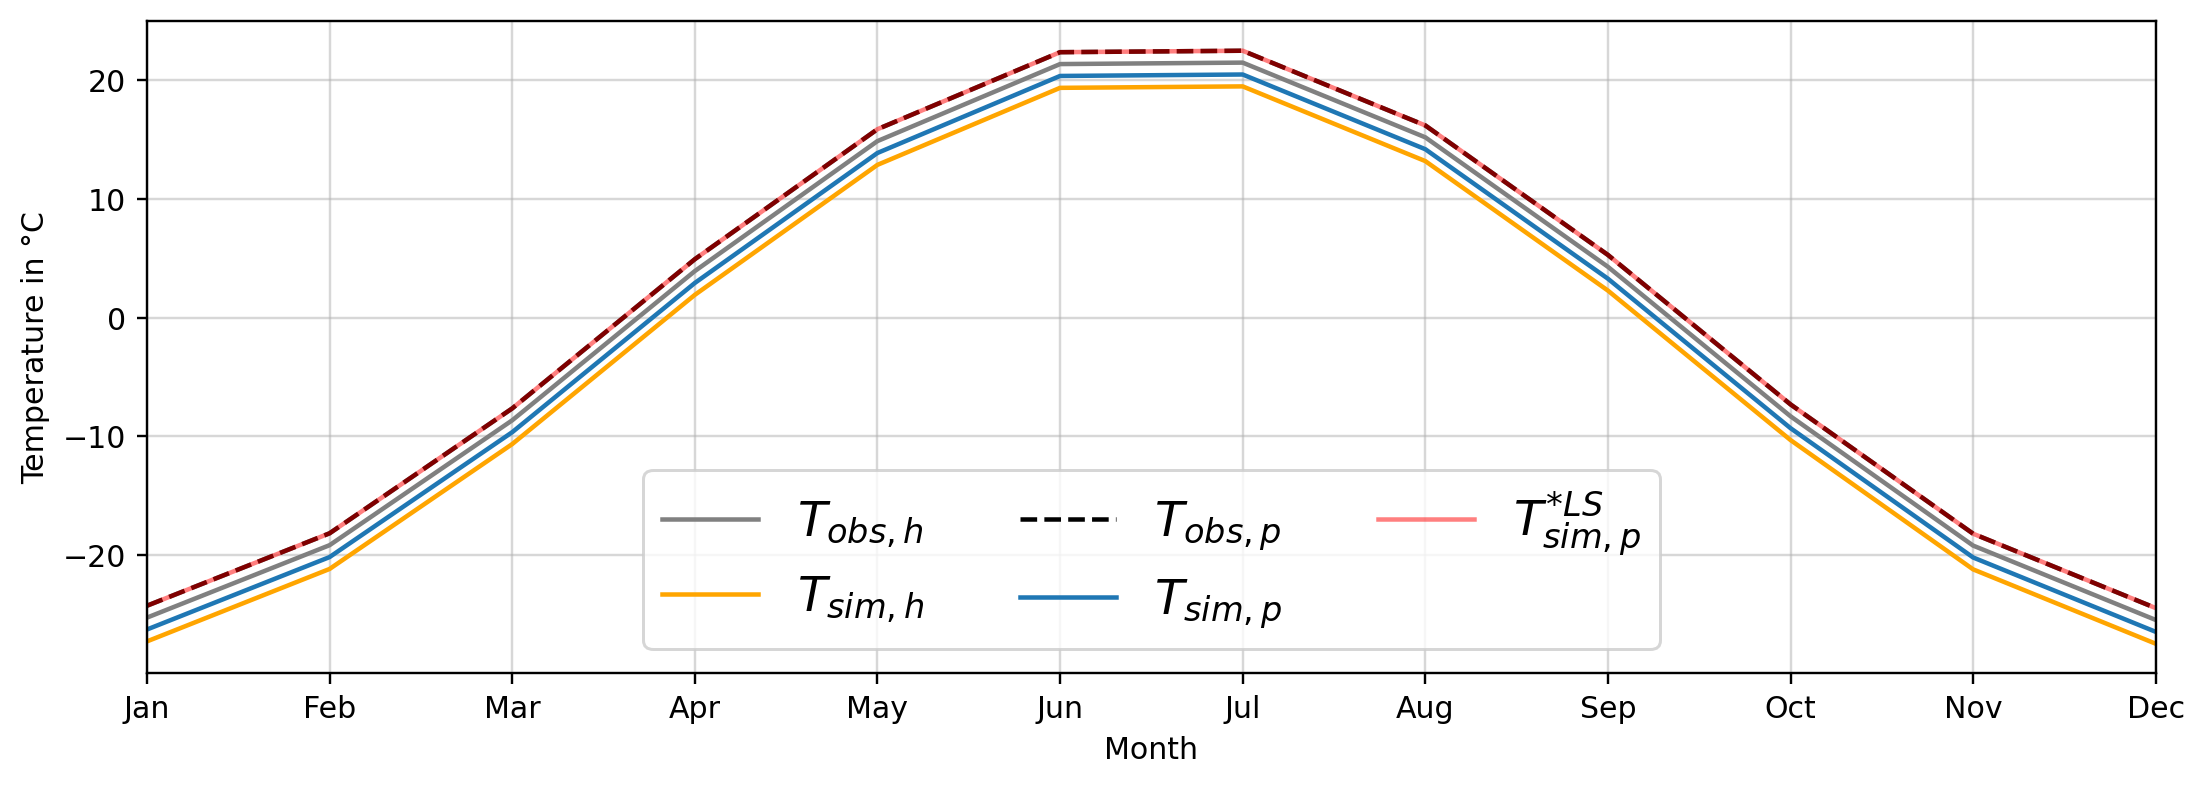

In [17]:
labels = ['$T_{obs,h}$', '$T_{obs,p}$', '$T_{sim,p}$', '$T^{*LS}_{sim,p}$']
plt.figure(figsize=(12,4),dpi=216)
period = 'time.month'
plt.plot(obsh[var].groupby(period).mean(...), color='gray', label=labels[0])
plt.plot(simh[var].groupby(period).mean(...), color='orange', label='$T_{sim,h}$')
plt.plot(obsp[var].groupby(period).mean(...), color='black', linestyle='--', label=labels[1])
plt.plot(simp[var].groupby(period).mean(...), color='C0', label=labels[2])
plt.plot(tas_ls_corrected['tas'].groupby(period).mean(...), color='red', label=labels[3],alpha=.5)

plt.gca().set_xticks(np.arange(12))
plt.gca().set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.gca().yaxis.grid(alpha=0.5)
plt.gca().xaxis.grid(alpha=0.5)

plt.xlabel('Month')
plt.ylabel(f'Temperature in °C')

plt.legend(fontsize=16, loc='lower center', ncol=3);
plt.xlim(0,11);

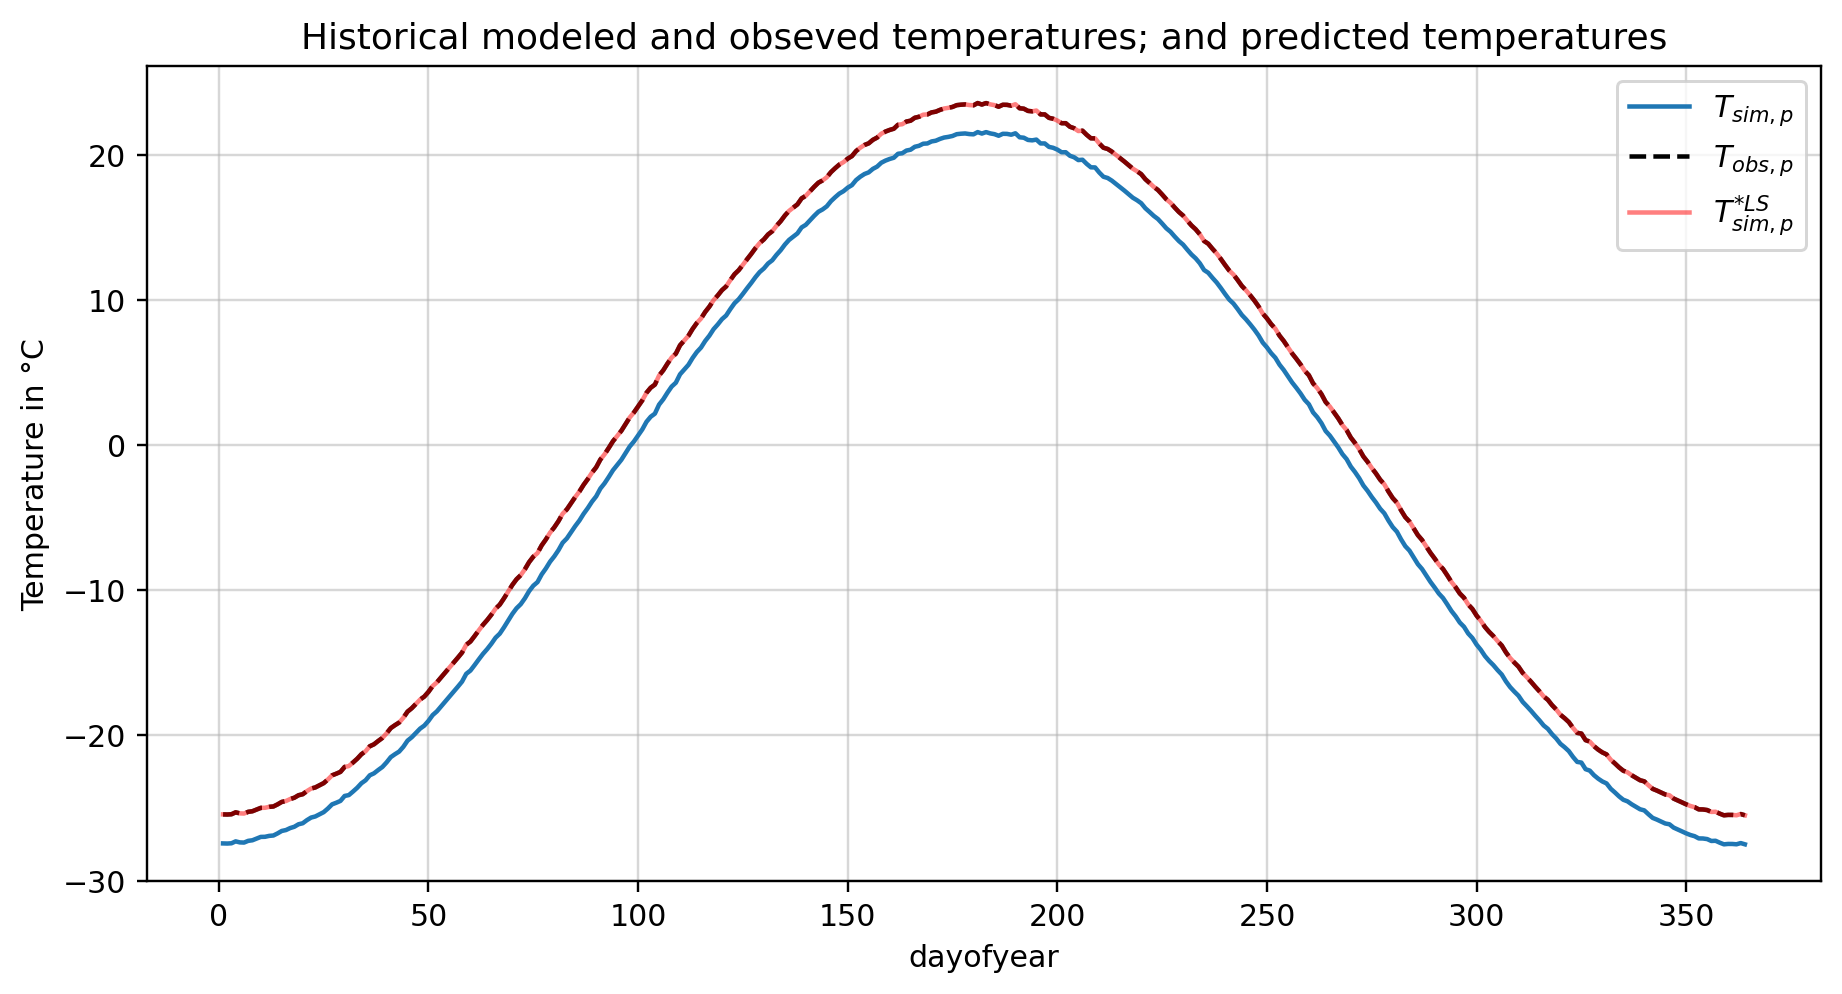

In [18]:
plt.figure(figsize=(10,5),dpi=216)
simp[var].groupby('time.dayofyear').mean(...)[:-1].plot(label='$T_{sim,p}$', color='C0')
obsp[var].groupby('time.dayofyear').mean(...)[:-1].plot(label='$T_{obs,p}$', color='black', linestyle='--')
tas_ls_corrected[var].groupby('time.dayofyear').mean(...)[:-1].plot(label='$T^{*LS}_{sim,p}$', color='red', alpha=.5)
plt.title('Predicted modeled and observed temperatures')
plt.gca().yaxis.grid(alpha=0.5)
plt.gca().xaxis.grid(alpha=0.5)
plt.ylabel('Temperature in °C')
plt.legend();

# Compute $MBE$ and $RMSE$

In [19]:
from sklearn.metrics import mean_squared_error
rmse = lambda targets, predictions: mean_squared_error(targets, predictions, squared=False)

def rmse3d(targets, predictions) -> float:
    rmses = []
    a, b = targets.transpose('lat','lon','time'), predictions.transpose('lat','lon','time')
    for lat in range(len(a)):
        for lon in range(len(a[lat])):
            rmses.append(rmse(a[lat][lon], b[lat][lon]))
    return np.array(rmses).mean()

mbe = lambda targets, predictions: (np.array(predictions) - np.array(targets)).mean()

In [25]:
print('''
===== Mean Bias Error =====
Default:       ~{mbe1}
LS-corrected:  ~{mbe2}

===== Root Mean Square Error =====
Default:      ~{rmse1}
LS-corrected: ~{rmse2}

'''.format(
    mbe1=np.round(mbe(obsp[var], simp[var]),4),
    mbe2=np.round(mbe(obsp[var], tas_ls_corrected[var]),4),
    rmse1=np.round(rmse3d(obsp[var], simp[var]),4),
    rmse2=np.round(rmse3d(obsp[var], tas_ls_corrected[var]),4)
))


===== Mean Bias Error =====
Default:       ~-2.0
LS-corrected:  ~0.0

===== Root Mean Square Error =====
Default:      ~2.0
LS-corrected: ~0.0


